<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9A%D1%80%D0%B5%D1%81%D1%82%D0%B8%D0%BA%D0%B8_%D0%BD%D0%BE%D0%BB%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Крестики-нолики

# Tic-tac-toe


В этом уроке мы научимся распознавать и отличать все элементы, которые находятся на поле игры крестики-нолики

In this lesson we will learn to recognize and distinguish all the elements that are on the field of tic-tac-toe

Думаю, правила игры вам не стоит объяснять, а вот несколько новых понятий объяснить все же стоит. 


I don't think you need to explain the rules of the game, but a few new concepts are worth explaining. 


> **Соотношение сторон** - это отношение ширины изображения к высоте изображения

> **Aspect ratio** is the ratio of the image width to the image height

Фактическое определение соотношения сторон контура   выглядит следующим образом:

The actual definition of the outline aspect ratio is as follows:

**`соотношение сторон = ширина изображения / высота изображения`**






**`Aspect ratio = image width / image height`**





> **Выпуклый корпус** - это наименьшее возможное выпуклое множество, которое содержит все точки.

> **The convex hull** is the smallest possible convex set that contains all points.

Выпуклый корпус похож на математическую резинку.



A convex hull is like a mathematical rubber band.


>**Заполненность** - это площадь контура, разделенная на площадь выпуклой оболочки:

>**Solidity** is the contour area divided by the convex hull area:

**`Заполненность = площадь контура / площадь выпуклости корпуса`**

**`Solidity = contour area / convex hull area`**

Невозможно иметь значение заполненности больше 1





It is not possible to have a solidity value greater than 1

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_27.Tictactoe.zip
!unzip Lesson_27.Tictactoe.zip
%cd /content/Lesson_27.Tictactoe

--2022-02-03 18:56:34--  http://dataudt.ru/datasets/cv/Lesson_27.Tictactoe.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8443 (8.2K) [application/zip]
Saving to: ‘Lesson_27.Tictactoe.zip’

Lesson_27.Tictactoe 100%[===================>]   8.25K  --.-KB/s    in 0s      

2022-02-03 18:56:34 (155 MB/s) - ‘Lesson_27.Tictactoe.zip’ saved [8443/8443]

Archive:  Lesson_27.Tictactoe.zip
  inflating: Lesson_27.Tictactoe/tictactoe.png  
  inflating: Lesson_27.Tictactoe/Tictactoe.py  
/content/Lesson_27.Tictactoe


In [2]:
# импортируем необходимые модули
# import the necessary packages
import cv2
import imutils
from google.colab.patches import cv2_imshow

In [3]:
# создаем отдельный словарь с аргументами 
# create a separate dictionary with arguments 
args = {
# путь к входному изображению 
# the path to the input image
'image':"tictactoe.png", 
}

In [4]:
# загружаем изображение игры крестики-нолики
# и конвертируем его в градации серого
# load the tic-tac-toe image and convert it to grayscale
image = cv2.imread(args['image'])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# находим все контуры на рисунке крестики-нолики
# find all contours on the tic-tac-toe board
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


X (Contour #1) -- solidity=0.56
O (Contour #2) -- solidity=0.99
O (Contour #3) -- solidity=0.99
X (Contour #4) -- solidity=0.56
X (Contour #5) -- solidity=0.56
O (Contour #6) -- solidity=0.99
? (Contour #7) -- solidity=0.30
Output


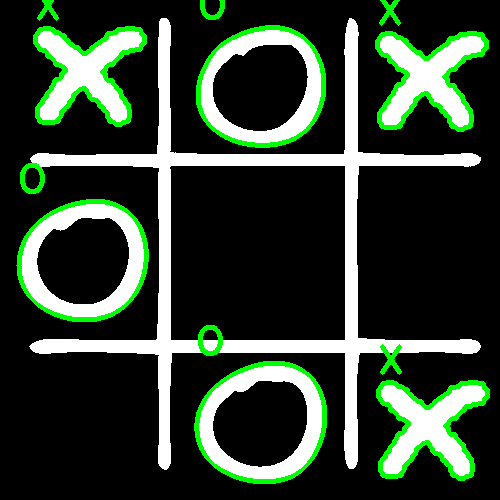

In [5]:
# перебираем контуры
# loop over the contours
for (i, c) in enumerate(cnts):
	# вычисляем площадь контура вместе с ограничивающей рамкой
    # для вычисления соотношения сторон
    # compute the area of the contour along with the bounding box
	# to compute the aspect ratio
	area = cv2.contourArea(c)
	(x, y, w, h) = cv2.boundingRect(c)

	# вычисляем выпуклую оболочку контура, затем используем 
    # площадь исходного контура и площадь выпуклой оболочки
    # для вычисления заполненности
    # compute the convex hull of the contour, then use the area of the
	# original contour and the area of the convex hull to compute the
	# solidity
	hull = cv2.convexHull(c)
	hullArea = cv2.contourArea(hull)
	solidity = area / float(hullArea)

	# инициализируем текстовый символ
    # initialize the character text
	char = "?"

	# если заполненность высокая, то мы рассматриваем `O`
    # if the solidity is high, then we are examining an `O`
	if solidity > 0.9:
		char = "O"

    # в противном случае, если заполненность 
    # все еще достаточно высока, мы исследуем `X`
    # otherwise, if the solidity it still reasonable high, we
	# are examining an `X`
	elif solidity > 0.5:
		char = "X"

    # если символ не неизвестен, нарисуем его
    # if the character is not unknown, draw it
	if char != "?":
		cv2.drawContours(image, [c], -1, (0, 255, 0), 3)
		cv2.putText(image, char, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.25,
			(0, 255, 0), 4)

    # отобразим характеристики контура
    # show the contour properties
	print("{} (Contour #{}) -- solidity={:.2f}".format(char, i + 1, solidity))

# покажем выходное изображение
# show the output image
print("Output") 
cv2_imshow(image)
